# Training

In [1]:
# Import all packages

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import sys
%matplotlib inline

In [2]:
# chdir. it depends on the platform
if sys.platform == 'linux':
    # if os is linux cd to
    project_path = "/home/mate/develop/PycharmProjects/GeFace/"
    NUMBER_OF_DATA = 9000
elif sys.platform is 'windows':
    pass
else:
    pass

os.chdir(project_path)

In [3]:
try:
    print(os.getcwd())
    # Open CSV with all informations
    csv_file = pd.read_csv("faces_colored/faces_correct.csv",delimiter = ',', encoding = "ISO-8859-1", engine='python')
    pd.set_option('display.max_columns', 100)
except (FileNotFoundError):
    print("CSV file not found")
    current_path = os.getcwd()
    print("Current path is " + current_path)

/home/mate/develop/PycharmProjects/GeFace


In [4]:
csv_file.head()

,nr,age,full_path,gender
0,0,69,01/nm0000001_rm124825600_1899-5-10_1968.jpg,1.0
1,1,71,01/nm0000001_rm3343756032_1899-5-10_1970.jpg,1.0
2,2,69,01/nm0000001_rm577153792_1899-5-10_1968.jpg,1.0
3,5,67,02/nm0000002_rm1075631616_1924-9-16_1991.jpg,0.0
4,6,80,02/nm0000002_rm1346607872_1924-9-16_2004.jpg,0.0


In [5]:
#df = csv_file.drop(columns=["nr"])
df = csv_file 

In [6]:
# convert 1.0 to m as male
#         0.0 to f as female
def mod(x):
    if x == 1.0:
        x = "m"
    else:
        x = "f"
    return x

df["gender"] = df["gender"].apply(mod)

In [7]:
df.head()

,nr,age,full_path,gender
0,0,69,01/nm0000001_rm124825600_1899-5-10_1968.jpg,m
1,1,71,01/nm0000001_rm3343756032_1899-5-10_1970.jpg,m
2,2,69,01/nm0000001_rm577153792_1899-5-10_1968.jpg,m
3,5,67,02/nm0000002_rm1075631616_1924-9-16_1991.jpg,f
4,6,80,02/nm0000002_rm1346607872_1924-9-16_2004.jpg,f


In [8]:
# create dataset for testing the network
import random
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler


proba_df = df.head(NUMBER_OF_DATA)

# Randomize but always the same random numbers
np.random.seed(42)
random.seed(42)
# shuffle rows
proba_df = shuffle(proba_df)

In [9]:
proba_df.head()

,nr,age,full_path,gender
7940,13900,30,39/nm0000139_rm1366989568_1972-8-30_2002.jpg,f
1162,2180,44,93/nm0000093_rm3216481024_1963-12-18_2007.jpg,m
582,1218,46,76/nm0000076_rm1079950080_1932-2-6_1978.jpg,m
4081,7006,53,14/nm0000114_rm3459219712_1957-12-13_2010.jpg,m
8412,14656,50,40/nm0000140_rm4245330432_1944-9-25_1994.jpg,m


In [10]:
# calculate test train valid data numbers
test_num = int(np.floor(0.1 * proba_df.shape[0]))
valid_num = int(np.floor(0.2 * proba_df.shape[0]))
train_num = int(proba_df.shape[0] - test_num - valid_num)
print("train: {} | valid: {} | test: {}".format(train_num, valid_num, test_num))

train: 6300 | valid: 1800 | test: 900


In [11]:
# split the data into train valid and test data
train_data = proba_df.iloc[0:train_num, :]

valid_data = proba_df.iloc[train_num:train_num + valid_num, :]

test_data = proba_df.iloc[ train_num+valid_num:, :]

print("train: {} | valid: {} | test: {}".format(train_data.shape, valid_data.shape, test_data.shape))

train: (6300, 4) | valid: (1800, 4) | test: (900, 4)


In [12]:
image_path = "faces_colored/"
x_train_p = image_path + train_data['full_path'].values
x_valid_p = image_path + valid_data['full_path'].values
x_test_p = image_path + test_data['full_path'].values

# x_train_l = image_path + train_data['age'].values
# x_valid_l = image_path + train_data['age'].values
# x_test_l = image_path + train_data['age'].values

x_test_p.shape
x_test_p[0]

'faces_colored/08/nm0000108_rm2615513088_1959-3-18_2006.jpg'

In [18]:
# get the ages
y_train_age = train_data['age'].values
y_valid_age = valid_data['age'].values
y_test_age = test_data['age'].values

print("age:" ,len(y_train_age), " | ", len(y_valid_age))
y_train_age


age: 6300  |  1800


array([30, 44, 46, ..., 49, 43, 50])

In [19]:
y_train_gender = train_data['gender'].values
y_valid_gender = valid_data['gender'].values
y_test_gender = test_data['gender'].values
print("gender:", len(y_train_gender), " | ", len(y_valid_gender))

# convert to string
y_train_age = y_train_age.astype("str")
y_valid_age = y_valid_age.astype("str")
y_test_age = y_test_age.astype("str")

#concate them
y_train_gen_age = np.core.defchararray.add(y_train_age, y_train_gender)
y_valid_gen_age = np.core.defchararray.add(y_valid_age, y_valid_gender)
y_test_gen_age = np.core.defchararray.add(y_test_age, y_test_gender)

print("gen_age:", len(y_train_gen_age), " | ", len(y_valid_gen_age))

gender: 6300  |  1800
gen_age: 6300  |  1800


# Copy train, valid, test data into a new folder

In [20]:
proba_df.head()

,nr,age,full_path,gender
7940,13900,30,39/nm0000139_rm1366989568_1972-8-30_2002.jpg,f
1162,2180,44,93/nm0000093_rm3216481024_1963-12-18_2007.jpg,m
582,1218,46,76/nm0000076_rm1079950080_1932-2-6_1978.jpg,m
4081,7006,53,14/nm0000114_rm3459219712_1957-12-13_2010.jpg,m
8412,14656,50,40/nm0000140_rm4245330432_1944-9-25_1994.jpg,m


In [21]:
from shutil import copyfile, copy2
try:
    os.mkdir("test_face")
except FileExistsError:
    print("test_face Direcotry exist")
    
# training 
try:
    os.mkdir("train_face")
    # create directory structure
    
    
except FileExistsError:
    print("train_face Direcotry exist")
    
for i in range(100):
    try:
        if i < 10:
        
            os.mkdir("train_face/0" + str(i))
        else:
            os.mkdir("train_face/" + str(i))
    except FileExistsError:
        continue
i = 0
dest_path = "train_face/"+train_data['full_path'].values
for p in x_train_p:
    
    copy2(p, dest_path[i])
    i += 1
#     print("train_face/"+train_data['full_path'].values)
#     print(dest_path[i])

# validation
try:
    os.mkdir("valid_face")
    # create directory structure
    
    for i in range(100):
        try:
            if i < 10:
            
                os.mkdir("valid_face/0" + str(i))
            else:
                os.mkdir("valid_face/" + str(i))
        except FileExistsError:
            continue
except FileExistsError:
    print("valid_face Direcotry exist")
    
i = 0
dest_path = "valid_face/"+valid_data['full_path'].values
for p in x_valid_p:
    
    copy2(p, dest_path[i])
    i += 1
#     print("train_face/"+train_data['full_path'].values)
#     print(dest_path[i])

test_face Direcotry exist
train_face Direcotry exist
valid_face Direcotry exist


# Training and model building

In [22]:
# import the necessary packages
import sys
import os
import PIL
# import the necessary packages
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Lambda
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
import tensorflow as tf
from keras.optimizers import *
from keras.applications import *
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")
 
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
# from pyimagesearch.smallervggnet import SmallerVGGNet
import matplotlib.pyplot as plt
# from imutils import paths
import numpy as np
import argparse
import random
import pickle
import cv2
import os

Using TensorFlow backend.
/home/mate/.virtualenvs/deeplearn_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.


In [1]:
class FaceNet:
    
    @staticmethod
    def build_ages_branch(inputs, numAges, finalAct="softmax", chanDim=-1):
        # utilize a lambda layer to convert the 3 channel input to a
        # grayscale representation

        padding = "same"
        # CONV => RELU => POOL
        x = Conv2D(32, (3, 3), padding=padding)(inputs) 
        x = Activation("relu")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = MaxPooling2D(pool_size=(3, 3))(x)
       
        
        
        x = Conv2D(32, (3, 3), padding=padding)(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = Conv2D(32, (3, 3), padding=padding)(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        x = Dropout(0.25)(x)
        
         # (CONV => RELU) * 2 => POOL
        x = Conv2D(32, (5, 5), padding=padding)(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = Conv2D(32, (3, 3), padding=padding)(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        
        
        
        
        # (CONV => RELU) * 2 => POOL
        x = Conv2D(64, (3, 3), padding=padding)(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = Conv2D(64, (3, 3), padding=padding)(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        x = Dropout(0.25)(x)
        
        # (CONV => RELU) * 2 => POOL
        x = Conv2D(64, (3, 3), padding=padding)(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = Conv2D(64, (3, 3), padding=padding)(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        x = Dropout(0.25)(x)
        
 
        # (CONV => RELU) * 2 => POOL
        x = Conv2D(128, (3, 3), padding=padding)(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = Conv2D(128, (3, 3), padding=padding)(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        x = Dropout(0.25)(x)
        
        
        x = Conv2D(128, (3, 3), padding=padding)(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = Conv2D(128, (3, 3), padding=padding)(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=chanDim)(x)
#         x = MaxPooling2D(pool_size=(2, 2))(x)
        x = Dropout(0.25)(x)
        
        # define a branch of output layers for the number of different
        # ages
        x = Flatten()(x)
        x = Dense(256)(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(numAges)(x)
        x = Activation(finalAct, name="ages_output")(x)
 
        # return the category prediction sub-network
        return x
    
    
    @staticmethod
    def build(width, height, numAges, numGender, finalAct="softmax"):
        # initialize the input shape and channel dimension (this code
        # assumes you are using TensorFlow which utilizes channels
        # last ordering)
        inputShape = (height, width, 3)
        chanDim = -1
 
        # construct both the "category" and "color" sub-networks
        inputs = Input(shape=inputShape)
        agesBranch = FaceNet.build_ages_branch(inputs,
            numAges, finalAct=finalAct, chanDim=chanDim)
        genderBranch = FaceNet.build_gender_branch(inputs,
            numGender, finalAct=finalAct, chanDim=chanDim)
 
        # create the model using our input (the batch of images) and
        # two separate outputs -- one for the clothing category
        # branch and another for the color branch, respectively
        model = Model(
            inputs=inputs,
            outputs=[agesBranch, genderBranch],
            name="FaceNet")
 
        # return the constructed network architecture
        return model

In [78]:
# fix seed for reproducible results (only works on CPU, not GPU)
seed = 42
np.random.seed(seed=seed)
tf.set_random_seed(seed=seed)

# initialize the number of epochs to train for, initial learning rate,
# batch size, and image dimensions
EPOCHS = 200
INIT_LR = 1e-3
BS = 32
IMAGE_DIMS = (96, 96, 3)


In [25]:
# Create inputs

# train
# loop over the input images
train_x = []
for imagePath in x_train_p:
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = img_to_array(image)
    train_x.append(image)
    
# valid
# loop over the input images
valid_x = []
for imagePath in x_valid_p:
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = img_to_array(image)
    valid_x.append(image)
 
print("train_x: {} | valid_x: {}".format(len(train_x), len(valid_x)))

train_x: 6300 | valid_x: 1800


In [26]:
y_train_gen_age

array(['30f', '44m', '46m', ..., '49m', '43f', '50m'], dtype='<U29')

In [27]:
# scale the raw pixel intensities to the range [0, 1]
train_x = np.array(train_x, dtype="float") / 255.0

lb_age = LabelBinarizer()

y_train_gen_age = lb_age.fit_transform(y_train_gen_age)

# print(y_train_gender)

y_train_gen_age = np.array(y_train_gen_age)

# print(train_y)
print("[INFO] train data matrix: {:.2f}MB".format(
	train_x.nbytes / (1024 * 1000.0)))
 
# print(y_train_gender)
# binarize the labels

# scale the raw pixel intensities to the range [0, 1]
valid_x = np.array(valid_x, dtype="float") / 255.0

y_valid_gen_age = np.array(y_valid_gen_age)

print("[INFO] valid data matrix: {:.2f}MB".format(
	valid_x.nbytes / (1024 * 1000.0)))
 
# binarize the labels
print("[INFO] class labels:")
# mlb = MultiLabelBinarizer()
y_valid_gen_age = lb_age.transform(y_valid_gen_age)
    
print("train_x:",len(train_x))
print("y_train_gen_age:",len(y_train_gen_age))
print("valid_x", len(valid_x))
print("y_valid_gen_age",len(y_valid_gen_age))

[INFO] train data matrix: 1360.80MB
[INFO] valid data matrix: 388.80MB
[INFO] class labels:
train_x: 6300
y_train_gen_age: 6300
valid_x 1800
y_valid_gen_age 1800


In [28]:
y_train_gen_age.shape

(6300, 136)

In [29]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
	horizontal_flip=True, fill_mode="nearest",
#     brightness_range=(0.2,1.0),
                        )

In [2]:
# initialize the model
print("Ages number", len(lb_age.classes_))
print("[INFO] compiling model...")
# load model
model = FaceNet.build(IMAGE_DIMS[0], IMAGE_DIMS[1], numAges=len(lb_age.classes_), finalAct="softmax")
# create optimazitions method
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

#model.compile(loss="categorical_crossentropy", optimizer=opt,
#	metrics=["accuracy"])
losses = {
	"ages_output": "categorical_crossentropy",
}
lossWeights = {"ages_output": 1.0}

model.compile(loss=losses, optimizer=opt,
	metrics=["accuracy"])

# Create callback list for checkpoint and Earlystopping
callbacks_list = [
        ModelCheckpoint(project_path+"gen_ages_model.hdf5", monitor='val_acc', verbose=1, save_best_only=True),
        EarlyStopping(monitor='val_loss', patience=40, verbose=1)
    ]

# train the network
print("[INFO] training network...")

History = model.fit(
        train_x,
        {"ages_output": y_train_gen_age},
        validation_data=(valid_x,
        {"ages_output": y_valid_gen_age}),
        epochs=EPOCHS,
        verbose=1,
        callbacks=callbacks_list,
     )


# save the model to disk
print("[INFO] serializing network...")
model.save(project_path+"gen_ages_model.hdf5")
 
# save the category binarizer to disk
print("[INFO] serializing category label binarizer...")
f = open(project_path+"gen_ages.label", "wb")
f.write(pickle.dumps(lb_age))
f.close()
 


NameError: name 'lb_age' is not defined

In [80]:
REAL_EPOCH = len(History.epoch)
# print(y_train_gender)

In [81]:

len(History.epoch)

68

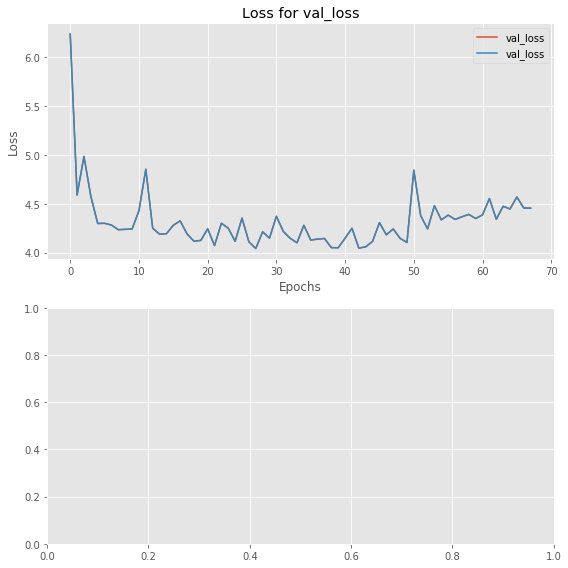

In [82]:
loss_names = ["val_loss"]
plt.style.use("ggplot")

(fig, ax) = plt.subplots(2, 1, figsize=(8,8))

for (i, l) in enumerate(loss_names):
    ax[i].set_title("Loss for {}".format(l))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel("Loss")
    ax[i].plot(np.arange(0, REAL_EPOCH), History.history[l], label=l)
    ax[i].plot(np.arange(0, REAL_EPOCH), History.history[l],label=l)
    ax[i].legend()
    
    plt.tight_layout()
    plt.savefig("multi_loss.png")

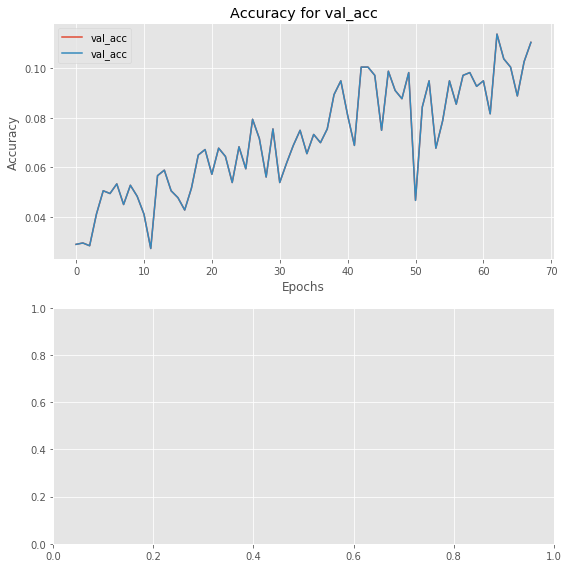

In [83]:
accuracy_names = ["val_acc"]
plt.style.use("ggplot")

(fig, ax) = plt.subplots(2, 1, figsize=(8,8))

for (i, l) in enumerate(accuracy_names):
    ax[i].set_title("Accuracy for {}".format(l))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel("Accuracy")
    ax[i].plot(np.arange(0, REAL_EPOCH), History.history[l], label=l)
    ax[i].plot(np.arange(0, REAL_EPOCH), History.history[l],label=l)
    ax[i].legend()
    
    plt.tight_layout()
    plt.savefig("multi.png")
    

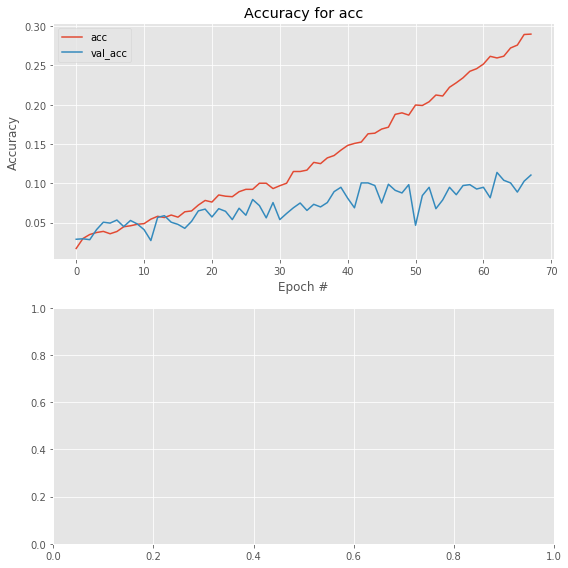

In [84]:
    # create a new figure for the accuracies
accuracyNames = ["acc"]
plt.style.use("ggplot")
(fig, ax) = plt.subplots(2, 1, figsize=(8, 8))
 
# loop over the accuracy names
for (i, l) in enumerate(accuracyNames):
	# plot the loss for both the training and validation data
	ax[i].set_title("Accuracy for {}".format(l))
	ax[i].set_xlabel("Epoch #")
	ax[i].set_ylabel("Accuracy")
	ax[i].plot(np.arange(0, REAL_EPOCH), History.history[l], label=l)
	ax[i].plot(np.arange(0, REAL_EPOCH), History.history["val_" + l],
		label="val_" + l)
	ax[i].legend()
 
# save the accuracies figure
plt.tight_layout()
plt.savefig("multi_accs.png")

In [85]:
from keras.models import load_model


1
[INFO] loading network...
[INFO] classifying image...
[INFO] age: 32m (7.95%)


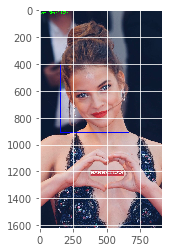

In [86]:

# load the image
image = cv2.imread(project_path+"p_barbi.jpg")
#image = cv2.imread(project_path+"faces_colored/01/nm0000001_rm124825600_1899-5-10_1968.jpg")
# image = cv2.imread("/home/mate/Pictures/dorka1.jpg")
face_cascade = cv2.CascadeClassifier('detector/haarcascade_frontalface_default.xml')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 5)

bb = []
i = 0
output = image.copy()
for (x,y,w,h) in faces:
    bb.append([w * h, i])
    cv2.rectangle(output,(x,y),(x+w,y+h),(255,0,0),2)
 #   roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    i += 1
    print(i)
    break

# pre-process the image for classification
image = cv2.resize(image, (96, 96))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

# load the trained convolutional neural network from disk, followed
# by the category and color label binarizers, respectively
print("[INFO] loading network...")
model = load_model("gen_ages_model.hdf5", custom_objects={"tf": tf})
agesLB = pickle.loads(open("gen_ages.label", "rb").read())
 
# classify the input image using Keras' multi-output functionality
print("[INFO] classifying image...")
(agesProba ) = model.predict(image)
 
# find indexes of both the category and color outputs with the
# largest probabilities, then determine the corresponding class
# labels
agesIdx = agesProba[0].argmax()

agesLabel = agesLB.classes_[agesIdx]

# draw the category label and color label on the image
agesText = "age: {} ({:.2f}%)".format(agesLabel,
	agesProba[0][agesIdx] * 100)


cv2.putText(output, agesText, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
	0.7, (0, 255, 0), 2)

# display the predictions to the terminal as well
print("[INFO] {}".format(agesText))
# show the probabilities for each of the individual labels
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
# show the output image
# print("[INFO] {} years old".format(label))
plt.imshow(output,)

In [ ]:
History.model.count_params()